In [2]:
library(lisi)
library(Seurat)
library(harmony)
library(magrittr)
library(gridExtra)
library(ggthemes)
library(scales)
library(pheatmap)
library(dplyr)
library(monocle)
library(reticulate)
library(ggbeeswarm)
library(ggrepel)
library(plyr)
library(ggplot2)
library(gridExtra)
library(ggthemes)
library(scales)
library(pheatmap)
library(dplyr)
library(RColorBrewer)
library(ggbeeswarm)
library(ggrepel)
library(patchwork)
library(MASS)
library(matrixStats)
library(viridis)
library(pbapply)
library(parallel)
library(grid)

# LISI: (Local inverse Simpson’s index): measures degree of batch mixing in a low-dimensional embedding
#### "Instead of a fixed number of nearest neighbors as in the case of kBET, LISI selects the nearest neighbors based on the local distribution of distances with a fixed perplexity"
#### "The selected neighbors are then used to compute the inverse Simpson’s index for diversity, which is the effective number of types present in this neighborhood"

## After harmony correction

In [3]:
meta_all <- readRDS("meta_all_weighted_macropahge_cosine_s_d_ds_new_cluster_2020_07_01.rds")
meta_all$cell <- as.character(meta_all$cell)
rownames(meta_all) <- meta_all$cell  
colnames(meta_all)

meta_all[1:4, c("sample", "disease", "dataset", "res_0.20_annot")]

[1] "cell"                  "dataset"               "technology"           
  [4] "sample"                "disease"               "cell_type"            
  [7] "nUMI"                  "nGene"                 "percent_mito"         
 [10] "percent.ribo"          "harmonized_s_PC1"      "harmonized_s_PC2"     
 [13] "harmonized_s_PC3"      "harmonized_s_PC4"      "harmonized_s_PC5"     
 [16] "harmonized_s_PC6"      "harmonized_s_PC7"      "harmonized_s_PC8"     
 [19] "harmonized_s_PC9"      "harmonized_s_PC10"     "harmonized_s_PC11"    
 [22] "harmonized_s_PC12"     "harmonized_s_PC13"     "harmonized_s_PC14"    
 [25] "harmonized_s_PC15"     "harmonized_s_PC16"     "harmonized_s_PC17"    
 [28] "harmonized_s_PC18"     "harmonized_s_PC19"     "harmonized_s_PC20"    
 [31] "harmonized_d_PC1"      "harmonized_d_PC2"      "harmonized_d_PC3"     
 [34] "harmonized_d_PC4"      "harmonized_d_PC5"      "harmonized_d_PC6"     
 [37] "harmonized_d_PC7"      "harmonized_d_PC8"      "harmonized_d_PC9"     
 [40] "harmonized_d_PC10"     "harmonized_d_PC11"     "harmonized_d_PC12"    
 [43] "harmonized_d_PC13"     "harmonized_d_PC14"     "harmonized_d_PC15"    
 [46] "harmonized_d_PC16"     "harmonized_d_PC17"     "harmonized_d_PC18"    
 [49] "harmonized_d_PC19"     "harmonized_d_PC20"     "harmonized_ds_PC1"    
 [52] "harmonized_ds_PC2"     "harmonized_ds_PC3"     "harmonized_ds_PC4"    
 [55] "harmonized_ds_PC5"     "harmonized_ds_PC6"     "harmonized_ds_PC7"    
 [58] "harmonized_ds_PC8"     "harmonized_ds_PC9"     "harmonized_ds_PC10"   
 [61] "harmonized_ds_PC11"    "harmonized_ds_PC12"    "harmonized_ds_PC13"   
 [64] "harmonized_ds_PC14"    "harmonized_ds_PC15"    "harmonized_ds_PC16"   
 [67] "harmonized_ds_PC17"    "harmonized_ds_PC18"    "harmonized_ds_PC19"   
 [70] "harmonized_ds_PC20"    "harmonized_s_UMAP1"    "harmonized_s_UMAP2"   
 [73] "harmonized_d_UMAP1"    "harmonized_d_UMAP2"    "harmonized_ds_UMAP1"  
 [76] "harmonized_ds_UMAP2"   "disease_new"           "s_d"                  
 [79] "harmonized_new_PC1"    "harmonized_new_PC2"    "harmonized_new_PC3"   
 [82] "harmonized_new_PC4"    "harmonized_new_PC5"    "harmonized_new_PC6"   
 [85] "harmonized_new_PC7"    "harmonized_new_PC8"    "harmonized_new_PC9"   
 [88] "harmonized_new_PC10"   "harmonized_new_PC11"   "harmonized_new_PC12"  
 [91] "harmonized_new_PC13"   "harmonized_new_PC14"   "harmonized_new_PC15"  
 [94] "harmonized_new_PC16"   "harmonized_new_PC17"   "harmonized_new_PC18"  
 [97] "harmonized_new_PC19"   "harmonized_new_PC20"   "harmonized_new_UMAP1" 
[100] "harmonized_new_UMAP2"  "harmonized_new2_UMAP1" "harmonized_new2_UMAP2"
[103] "res_0.20"              "res_0.40"              "res_0.60"             
[106] "gene"                  "res_0.20_annot"

sample,disease,dataset,res_0.20_annot
301-0159,OA,AMP RA,MRC1+ FABP4+
301-0159,OA,AMP RA,MRC1+ FABP4+
301-0159,OA,AMP RA,MRC1+ FABP4+
301-0159,OA,AMP RA,MRC1+ FABP4+


In [4]:
length(table(meta_all$sample))
table(meta_all$cell_type)
table(meta_all$dataset)
table(meta_all$res_0.20_annot)

meta_all[1:4, c(79:98)]

[1] 108


                   CM0                    CM1                    CM2 
                    96                    107                     21 
                   CM3                    CM4      Cycling Monocytes 
                    13                     45                     22 
Inflammatory Monocytes            Macrophages                myeloid 
                  1207                   7986                   2221 
 No Old Anotation lung                   Null                   NULL 
                 11484                   2838                  47738 
                 SC-M1                  SC-M2                  SC-M3 
                   267                    214                     71 
                 SC-M4 
                    43 


  AMP RA  AMP SLE COVID-19      IBD     Lung   Martin    Rahul 
     595      282    47738     9215    11484     2221     2838 


        FCN1+ IL1B+ CXCL10+   Macropahges  MRC1+ FABP4+ 
         7082         13453          9786         44052 

harmonized_new_PC1,harmonized_new_PC2,harmonized_new_PC3,harmonized_new_PC4,harmonized_new_PC5,harmonized_new_PC6,harmonized_new_PC7,harmonized_new_PC8,harmonized_new_PC9,harmonized_new_PC10,harmonized_new_PC11,harmonized_new_PC12,harmonized_new_PC13,harmonized_new_PC14,harmonized_new_PC15,harmonized_new_PC16,harmonized_new_PC17,harmonized_new_PC18,harmonized_new_PC19,harmonized_new_PC20
8.310091,-6.601238,1.089894,-2.3135787,4.309788,-2.3876351,3.435042,-1.195929,5.3969234,2.8637913,-0.09283988,-1.271977,-3.258906,2.748087,-0.9238324,1.72880449,5.920630,0.07740935,0.8416386,0.04964062
5.130697,-3.549763,-2.874635,-2.0113034,12.510071,6.3011716,1.404219,-3.651048,-0.3094158,0.1482141,2.66901235,4.996588,-5.325767,-1.435692,-5.8399897,0.03544453,3.919193,0.71228639,-2.2873844,-5.64913735
8.624229,3.668255,-2.097424,-3.5291570,5.445644,-3.6222817,5.374599,1.721332,-5.4143730,-1.5810743,0.47909751,8.763972,-7.325151,0.515196,-0.7922723,-0.17241080,3.097281,-0.34302764,-6.0605748,-0.53765841
3.808633,-4.558980,-4.107581,-0.1640838,9.583048,0.2130112,2.186485,-0.799584,2.5156392,0.1258370,4.79197059,1.173944,-5.701122,-1.809708,-6.2876647,-3.89286278,2.838593,-0.39407403,1.2890874,-4.79605934


In [22]:
# res <- compute_lisi(x, x_meta_all, c("sample", "site"), perplexity=30, nn_eps=0)
# res <- compute_lisi(x, x_meta_all, c("dataset", "sample", "cell_type", "disease", "res_0.30"), perplexity=30, nn_eps=0)

lisi_res <- rbind(
    lisi::compute_lisi(meta_all[,c(79:98)], meta_all, c("sample", "disease", "dataset", "res_0.20_annot"))
) %>% 
    tidyr::gather(key, val, sample, disease, dataset, res_0.20_annot)

lisi_res[1:4,]

saveRDS(lisi_res, "LISI_macrophage_after_harmony_2020-06-10.rds")

key,val
sample,8.837022
sample,1.350528
sample,5.694128
sample,3.248347


In [5]:
lisi_res <- readRDS("LISI_macrophage_after_harmony_2020-06-10.rds")

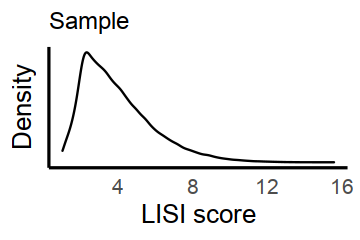

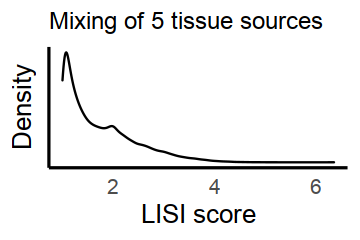

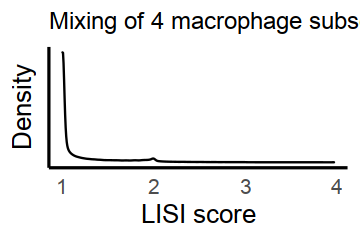

In [6]:
options(repr.plot.height = 2, repr.plot.width = 3)

ggplot(lisi_res[which(lisi_res$key == "sample"),]) +
    geom_density(
        aes(x  = val)
    ) +
#   scale_x_continuous(limits = c(1, 15))+
  labs(
      x = "LISI score",
      y = "Density",
#       title = paste0("Mixing of ", length(table(meta_all$sample))," samples", sep="")
      title = "Sample"
      ) +
  theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=14)
  )
ggsave("LISI_macro_after_harmony_sample.pdf", width = 3, height = 2)


ggplot(lisi_res[which(lisi_res$key == "dataset"),]) +
    geom_density(
        aes(x  = val)
    ) +
#   scale_x_continuous(limits = c(1, 5))+
  labs(
      x = "LISI score",
      y = "Density",
      title = paste0("Mixing of 6 tissue sources", sep="")
      ) +
  theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=14)
  )
ggsave("LISI_macro_after_harmony_tissue.pdf", width = 3, height = 2)



ggplot(lisi_res[which(lisi_res$key == "res_0.20_annot"),]) +
    geom_density(
        aes(x  = val)
    ) +
#   scale_x_continuous(limits = c(1, 5))+
  labs(
      x = "LISI score",
      y = "Density",
      title = paste0("Mixing of ", length(table(meta_all$res_0.20_annot))," macrophage subsets", sep="")
      ) +
  theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=14)
  )
ggsave("LISI_macro_after_harmony_subsets.pdf", width = 3, height = 2)



## Load the before harmonization embeddings

In [30]:
pca_res <- readRDS("pca_res_2020-06-09.rds")
pca_res <- as.data.frame(pca_res)
dim(pca_res)

pca_res <- pca_res[which(rownames(pca_res) %in% meta_all$cell),]
all(rownames(pca_res) == meta_all$cell)
pca_res$sample <- meta_all$sample
pca_res$disease <- meta_all$disease
pca_res$dataset <- meta_all$dataset
pca_res$res_0.20_annot <- meta_all$res_0.20_annot
dim(pca_res)

# c("sample", "disease", "dataset", "res_0.20_annot")

[1] 74475    20

[1] TRUE

[1] 74373    24

In [31]:
lisi_res <- rbind(
    lisi::compute_lisi(pca_res[,c(1:20)], pca_res, c("sample", "disease", "dataset", "res_0.20_annot"))
) %>% 
    tidyr::gather(key, val, sample, disease, dataset, res_0.20_annot)

lisi_res[1:4,]

saveRDS(lisi_res, "LISI_macrophage_before_harmony_2020-06-10.rds")

key,val
sample,3.960202
sample,1.237583
sample,3.058079
sample,1.911853


In [7]:
lisi_res <- readRDS("LISI_macrophage_before_harmony_2020-06-10.rds")

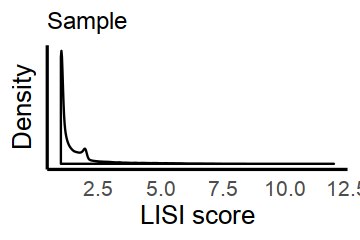

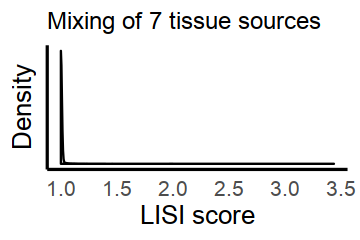

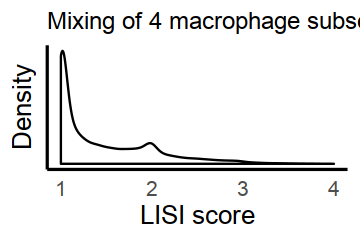

In [37]:
options(repr.plot.height = 2, repr.plot.width = 3)

ggplot(lisi_res[which(lisi_res$key == "sample"),]) +
    geom_density(
        aes(x  = val)
    ) +
#   scale_x_continuous(limits = c(1, 15))+
  labs(
      x = "LISI score",
      y = "Density",
#       title = paste0("Mixing of ", length(table(meta_all$sample))," samples", sep="")
      title = "Sample"
      ) +
  theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=14)
  )
ggsave("LISI_macro_before_harmony_sample.pdf", width = 3, height = 2)


ggplot(lisi_res[which(lisi_res$key == "dataset"),]) +
    geom_density(
        aes(x  = val)
    ) +
#   scale_x_continuous(limits = c(1, 5))+
  labs(
      x = "LISI score",
      y = "Density",
      title = paste0("Mixing of 6 tissue sources", sep="")
      ) +
  theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=14)
  )
ggsave("LISI_macro_before_harmony_tissue.pdf", width = 3, height = 2)



ggplot(lisi_res[which(lisi_res$key == "res_0.20_annot"),]) +
    geom_density(
        aes(x  = val)
    ) +
#   scale_x_continuous(limits = c(1, 5))+
  labs(
      x = "LISI score",
      y = "Density",
      title = paste0("Mixing of ", length(table(meta_all$res_0.20_annot))," macrophage subsets", sep="")
      ) +
  theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(color="black", size=14)
  )
ggsave("LISI_macro_before_harmony_subsets.pdf", width = 3, height = 2)
